# 10 minutes to pandas

파이썬 데이터 처리를 위한 라이브러리, 판다스(Pandas)를 스터디합니다.
 
[10 Minuts to Pandas 참조](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
---
**Contents**
1. Object Creation
2. Viewing Data
3. Selection
4. Missing Data
5. Operation
6. Merge
7. Grouping
8. Reshaping
9. Time Series
10. Cataegoricals
11. Plotting
12. Getting Data In / Out
13. Gotchas

Customarily, we import as follows.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# fix the seed
np.random.seed(28)

## 1. Object Creation

Creating a **Series** by passing a list of values, letting pandas create a default integer index.

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a **DataFrame** by passing a NumPy array, with a datetime index and labeled columns.

In [4]:
dates = pd.date_range("20220101", periods=6)
dates

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(
    data=np.random.randn(6, 4),
    index=dates,
    columns=list("ABCD")
)
df

,A,B,C,D
2022-01-01,0.446332,1.669120,-0.264280,-0.967835
2022-01-02,0.059188,1.514620,0.336870,-0.302369
2022-01-03,-0.838642,-0.517731,0.253508,-2.484704
2022-01-04,-0.651420,-1.775469,0.234286,1.239400
2022-01-05,-0.650334,-0.266215,-0.538720,0.420741
2022-01-06,-0.095286,-0.769876,-0.183725,0.176809


Creating a **DataFrame** by passing a dict of objects that can be converted to series-like.

In [6]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20210101"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2021-01-01,1.0,3,test,foo
1,1.0,2021-01-01,1.0,3,train,foo
2,1.0,2021-01-01,1.0,3,test,foo
3,1.0,2021-01-01,1.0,3,train,foo


The columns of the resulting **DataFrame** have different **dtypes**.

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 2. Viewing Data

Here is how to view the top and bottom rows of the frame.

In [8]:
df.head()

,A,B,C,D
2022-01-01,0.446332,1.669120,-0.264280,-0.967835
2022-01-02,0.059188,1.514620,0.336870,-0.302369
2022-01-03,-0.838642,-0.517731,0.253508,-2.484704
2022-01-04,-0.651420,-1.775469,0.234286,1.239400
2022-01-05,-0.650334,-0.266215,-0.538720,0.420741


In [9]:
df.tail(3)

,A,B,C,D
2022-01-04,-0.651420,-1.775469,0.234286,1.239400
2022-01-05,-0.650334,-0.266215,-0.538720,0.420741
2022-01-06,-0.095286,-0.769876,-0.183725,0.176809


Display the index, columns.

In [10]:
df.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`DataFrame.to_numpy()` gives a NumPy representation of the underlying data.

Note that this can be an expensive operation when your `DataFrame` has columns with different data types, which comes down to a fundamental difference between pandas and NumPy.

**Numpy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.**

Whenm you call `DataFrame.to_numpy()`, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame.

This may end up being object, wich requires casting every value to Python object.

For `df`, our `DataFrame` of all floating-point values, `DataFrame.to_numpy()` is fast and doesn't require copying data.

In [12]:
df.to_numpy()

array([[ 0.44633238,  1.66912005, -0.26427996, -0.96783493],
       [ 0.05918843,  1.51461999,  0.33687044, -0.3023687 ],
       [-0.8386418 , -0.51773125,  0.25350786, -2.48470399],
       [-0.65141987, -1.77546915,  0.23428583,  1.23939986],
       [-0.65033427, -0.26621493, -0.53871977,  0.42074053],
       [-0.09528633, -0.7698761 , -0.18372453,  0.17680895]])

For `df2`, the `DataFrame` with multiple dtypes, `DataFrane,to_numpy()` is relatively expensive.

In [13]:
df2.to_numpy()

array([[1.0, Timestamp('2021-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2021-01-01 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2021-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2021-01-01 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

> **Note:** `DataFrame.to_numpy()` does not include the index or column labels in the output.

`describe()` shows a quick static summary of your data.

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.288360,-0.024259,-0.027010,-0.319660
std,0.502690,1.353545,0.352726,1.290983
min,-0.838642,-1.775469,-0.538720,-2.484704
25%,-0.651148,-0.706840,-0.244141,-0.801468
50%,-0.372810,-0.391973,0.025281,-0.062780
75%,0.020570,1.069411,0.248702,0.359758
max,0.446332,1.669120,0.336870,1.239400


Transposing your data.

In [15]:
df.T

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06
A,0.446332,0.059188,-0.838642,-0.651420,-0.650334,-0.095286
B,1.669120,1.514620,-0.517731,-1.775469,-0.266215,-0.769876
C,-0.264280,0.336870,0.253508,0.234286,-0.538720,-0.183725
D,-0.967835,-0.302369,-2.484704,1.239400,0.420741,0.176809


Sorting by an axis.

In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2022-01-01,-0.967835,-0.264280,1.669120,0.446332
2022-01-02,-0.302369,0.336870,1.514620,0.059188
2022-01-03,-2.484704,0.253508,-0.517731,-0.838642
2022-01-04,1.239400,0.234286,-1.775469,-0.651420
2022-01-05,0.420741,-0.538720,-0.266215,-0.650334
2022-01-06,0.176809,-0.183725,-0.769876,-0.095286


Sorting by values.

In [17]:
df.sort_values(by="B")

,A,B,C,D
2022-01-04,-0.651420,-1.775469,0.234286,1.239400
2022-01-06,-0.095286,-0.769876,-0.183725,0.176809
2022-01-03,-0.838642,-0.517731,0.253508,-2.484704
2022-01-05,-0.650334,-0.266215,-0.538720,0.420741
2022-01-02,0.059188,1.514620,0.336870,-0.302369
2022-01-01,0.446332,1.669120,-0.264280,-0.967835


## 3. Selection

> **Note:** While standard Python/NumPy expression for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized padnas data access methods, `.at`, `.iat`, `.loc` and `.iloc`.

### Getting
Selection a single column, which yields a Series, equivalent to `df.A`.

In [18]:
df["A"]  # == df.A

2022-01-01    0.446332
2022-01-02    0.059188
2022-01-03   -0.838642
2022-01-04   -0.651420
2022-01-05   -0.650334
2022-01-06   -0.095286
Freq: D, Name: A, dtype: float64

Selection via  `[]`, which slices the rows.

In [19]:
df[0:3]

,A,B,C,D
2022-01-01,0.446332,1.669120,-0.264280,-0.967835
2022-01-02,0.059188,1.514620,0.336870,-0.302369
2022-01-03,-0.838642,-0.517731,0.253508,-2.484704


In [20]:
df["20220101":"20220103"]

,A,B,C,D
2022-01-01,0.446332,1.669120,-0.264280,-0.967835
2022-01-02,0.059188,1.514620,0.336870,-0.302369
2022-01-03,-0.838642,-0.517731,0.253508,-2.484704


### Selection by label
For getting a cross secion using a label.

In [21]:
df.loc[dates[0]]

A    0.446332
B    1.669120
C   -0.264280
D   -0.967835
Name: 2022-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label.

In [22]:
df.loc[:, ["A", "B"]]

,A,B
2022-01-01,0.446332,1.669120
2022-01-02,0.059188,1.514620
2022-01-03,-0.838642,-0.517731
2022-01-04,-0.651420,-1.775469
2022-01-05,-0.650334,-0.266215
2022-01-06,-0.095286,-0.769876


Showing label slicing, both endpoints are included.

In [23]:
df.loc["20220101":"20220103", ["A", "B"]]

,A,B
2022-01-01,0.446332,1.669120
2022-01-02,0.059188,1.514620
2022-01-03,-0.838642,-0.517731


Reduction in the dimensions of the returned object.

In [24]:
df.loc["20220101", ["A", "B"]]

A    0.446332
B    1.669120
Name: 2022-01-01 00:00:00, dtype: float64

For getting a scalar value.

In [25]:
df.loc[dates[0], "A"]

0.4463323778700458

For getting fast access to a scalar (equivalent to the prior method).

In [26]:
df.at[dates[0], "A"]

0.4463323778700458

### Selection by position

Selection via the position of the pased integers.

In [27]:
df.iloc[3]

A   -0.651420
B   -1.775469
C    0.234286
D    1.239400
Name: 2022-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python.

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2022-01-02,0.059188,0.336870
2022-01-03,-0.838642,0.253508
2022-01-05,-0.650334,-0.538720


For slicing rows explicitly.

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2022-01-02,0.059188,1.514620,0.336870,-0.302369
2022-01-03,-0.838642,-0.517731,0.253508,-2.484704


For slicing columns explicitly.

In [30]:
df.iloc[:, 1:3]

,B,C
2022-01-01,1.669120,-0.264280
2022-01-02,1.514620,0.336870
2022-01-03,-0.517731,0.253508
2022-01-04,-1.775469,0.234286
2022-01-05,-0.266215,-0.538720
2022-01-06,-0.769876,-0.183725


For getting a value explicitly.

In [31]:
df.iloc[1, 1]

1.5146199891809016

For getting fast access to a scalar (equivalent to the prior method).

In [32]:
df.iat[1, 1]

1.5146199891809016

### Boolean indexing

using a single column's values to select data.

In [33]:
df[df["A"] > 0]

,A,B,C,D
2022-01-01,0.446332,1.66912,-0.26428,-0.967835
2022-01-02,0.059188,1.51462,0.33687,-0.302369


Selecting values from a DataFrame where a boolean condition is met.

In [34]:
df[df > 0]

,A,B,C,D
2022-01-01,0.446332,1.66912,NaN,NaN
2022-01-02,0.059188,1.51462,0.336870,NaN
2022-01-03,NaN,NaN,0.253508,NaN
2022-01-04,NaN,NaN,0.234286,1.239400
2022-01-05,NaN,NaN,NaN,0.420741
2022-01-06,NaN,NaN,NaN,0.176809


Using `isin()` method for filtering.

In [35]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2022-01-01,0.446332,1.669120,-0.264280,-0.967835,one
2022-01-02,0.059188,1.514620,0.336870,-0.302369,one
2022-01-03,-0.838642,-0.517731,0.253508,-2.484704,two
2022-01-04,-0.651420,-1.775469,0.234286,1.239400,three
2022-01-05,-0.650334,-0.266215,-0.538720,0.420741,four
2022-01-06,-0.095286,-0.769876,-0.183725,0.176809,three


In [36]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2022-01-03,-0.838642,-0.517731,0.253508,-2.484704,two
2022-01-05,-0.650334,-0.266215,-0.538720,0.420741,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [37]:
s1 = pd.Series(
    data=[1, 2, 3, 4, 5, 6], 
    index=pd.date_range("20220102", periods=6)
)
s1

2022-01-02    1
2022-01-03    2
2022-01-04    3
2022-01-05    4
2022-01-06    5
2022-01-07    6
Freq: D, dtype: int64

In [38]:
df["F"] = s1
df

,A,B,C,D,F
2022-01-01,0.446332,1.669120,-0.264280,-0.967835,NaN
2022-01-02,0.059188,1.514620,0.336870,-0.302369,1.0
2022-01-03,-0.838642,-0.517731,0.253508,-2.484704,2.0
2022-01-04,-0.651420,-1.775469,0.234286,1.239400,3.0
2022-01-05,-0.650334,-0.266215,-0.538720,0.420741,4.0
2022-01-06,-0.095286,-0.769876,-0.183725,0.176809,5.0


Setting values by **label**.

In [39]:
df.at[dates[0], "A"] = 0

Setting values by **position**.

In [40]:
df.iat[0, 1] = 0

Setting by **assigning with a NumPy array**.

In [41]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations.

In [42]:
df

,A,B,C,D,F
2022-01-01,0.000000,0.000000,-0.264280,5,NaN
2022-01-02,0.059188,1.514620,0.336870,5,1.0
2022-01-03,-0.838642,-0.517731,0.253508,5,2.0
2022-01-04,-0.651420,-1.775469,0.234286,5,3.0
2022-01-05,-0.650334,-0.266215,-0.538720,5,4.0
2022-01-06,-0.095286,-0.769876,-0.183725,5,5.0


A `where` operation with setting.

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2022-01-01,0.000000,0.000000,-0.264280,-5,NaN
2022-01-02,-0.059188,-1.514620,-0.336870,-5,-1.0
2022-01-03,-0.838642,-0.517731,-0.253508,-5,-2.0
2022-01-04,-0.651420,-1.775469,-0.234286,-5,-3.0
2022-01-05,-0.650334,-0.266215,-0.538720,-5,-4.0
2022-01-06,-0.095286,-0.769876,-0.183725,-5,-5.0


## 4. Missing Data

Pandas primarily uses the value `np.nan` to represent missing data. it is by default not included in computations.

Reindexing allows you to change / add / delete the index on a specified axis. This returns a copy of the data.

In [44]:
df1 = df.reindex(
    index=dates[0:4],
    columns=list(df.columns)
)
df1.loc[dates[0]:dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2022-01-01,0.000000,0.000000,-0.264280,5,NaN,1.0
2022-01-02,0.059188,1.514620,0.336870,5,1.0,1.0
2022-01-03,-0.838642,-0.517731,0.253508,5,2.0,NaN
2022-01-04,-0.651420,-1.775469,0.234286,5,3.0,NaN


To drop any rows that have missing data.

In [45]:
df1.dropna(how="any")

,A,B,C,D,F,E
2022-01-02,0.059188,1.51462,0.33687,5,1.0,1.0


Filling missing data.

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2022-01-01,0.000000,0.000000,-0.264280,5,5.0,1.0
2022-01-02,0.059188,1.514620,0.336870,5,1.0,1.0
2022-01-03,-0.838642,-0.517731,0.253508,5,2.0,5.0
2022-01-04,-0.651420,-1.775469,0.234286,5,3.0,5.0


To get the boolean mask where values are `nan`.

In [47]:
pd.isna(df1)

,A,B,C,D,F,E
2022-01-01,False,False,False,False,True,False
2022-01-02,False,False,False,False,False,False
2022-01-03,False,False,False,False,False,True
2022-01-04,False,False,False,False,False,True


## 5. Operation

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic.

In [48]:
df.mean()

A   -0.362749
B   -0.302445
C   -0.027010
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis.

In [49]:
df.mean(1)

2022-01-01    1.183930
2022-01-02    1.582136
2022-01-03    1.179427
2022-01-04    1.161479
2022-01-05    1.508946
2022-01-06    1.790223
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. 

In addition, pandas automatically broadcasts along the specified dimension.

In [50]:
s = pd.Series(
    [1, 3, 5, np.nan, 6, 8],
    index=dates
).shift(2)
s

2022-01-01    NaN
2022-01-02    NaN
2022-01-03    1.0
2022-01-04    3.0
2022-01-05    5.0
2022-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis="index")

,A,B,C,D,F
2022-01-01,NaN,NaN,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN,NaN,NaN
2022-01-03,-1.838642,-1.517731,-0.746492,4.0,1.0
2022-01-04,-3.651420,-4.775469,-2.765714,2.0,0.0
2022-01-05,-5.650334,-5.266215,-5.538720,0.0,-1.0
2022-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data.

In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2022-01-01,0.000000,0.000000,-0.264280,5,NaN
2022-01-02,0.059188,1.514620,0.072590,10,1.0
2022-01-03,-0.779453,0.996889,0.326098,15,3.0
2022-01-04,-1.430873,-0.778580,0.560384,20,6.0
2022-01-05,-2.081208,-1.044795,0.021664,25,10.0
2022-01-06,-2.176494,-1.814671,-0.162060,30,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())

A    0.897830
B    3.290089
C    0.875590
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    4
2    6
3    3
4    2
5    5
6    3
7    1
8    4
9    2
dtype: int64

In [55]:
s.value_counts()

4    2
3    2
2    2
6    1
5    1
1    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses regular expressions by default (and in some cases always uses them).

In [56]:
s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"]
)
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 6. Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenationg pandas objects together with `concat()`

In [57]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.203463,0.327540,-0.383122,1.212968
1,0.849503,1.121849,-0.699058,-0.839865
2,1.851564,-0.792804,-0.657513,0.204968
3,0.222557,0.689886,-0.053914,0.125338
4,2.143695,-0.359661,-0.012342,-0.455056
5,0.638101,0.327963,0.125114,1.618298
6,-0.611335,1.565566,1.220150,2.663074
7,-1.107183,-0.513291,0.646413,0.472300
8,1.418362,0.346098,-0.142690,0.029203
9,-2.161313,-0.423219,-1.143078,0.229612


In [58]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.203463  0.327540 -0.383122  1.212968
 1  0.849503  1.121849 -0.699058 -0.839865
 2  1.851564 -0.792804 -0.657513  0.204968,
           0         1         2         3
 3  0.222557  0.689886 -0.053914  0.125338
 4  2.143695 -0.359661 -0.012342 -0.455056
 5  0.638101  0.327963  0.125114  1.618298
 6 -0.611335  1.565566  1.220150  2.663074,
           0         1         2         3
 7 -1.107183 -0.513291  0.646413  0.472300
 8  1.418362  0.346098 -0.142690  0.029203
 9 -2.161313 -0.423219 -1.143078  0.229612]

In [59]:
pd.concat(pieces)

,0,1,2,3
0,0.203463,0.327540,-0.383122,1.212968
1,0.849503,1.121849,-0.699058,-0.839865
2,1.851564,-0.792804,-0.657513,0.204968
3,0.222557,0.689886,-0.053914,0.125338
4,2.143695,-0.359661,-0.012342,-0.455056
5,0.638101,0.327963,0.125114,1.618298
6,-0.611335,1.565566,1.220150,2.663074
7,-1.107183,-0.513291,0.646413,0.472300
8,1.418362,0.346098,-0.142690,0.029203
9,-2.161313,-0.423219,-1.143078,0.229612


> **Note:** Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.

### Join

SQL style merges.

In [60]:
left = pd.DataFrame(
    {"key": ["foo", "foo"],
     "lval": [1, 2]}
)
right = pd.DataFrame(
    {"key": ["foo", "foo"],
     "rval": [4, 5]}
)
print(left, right, sep="\n\n")

   key  lval
0  foo     1
1  foo     2

   key  rval
0  foo     4
1  foo     5


In [61]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


It is Another example that can be given.

In [62]:
left = pd.DataFrame(
    {"key": ["foo", "bar"],
     "lval": [1, 2]}
)
right = pd.DataFrame(
    {"key": ["foo", "bar"],
     "rval": [4, 5]}
)
print(left, right, sep="\n\n")

   key  lval
0  foo     1
1  bar     2

   key  rval
0  foo     4
1  bar     5


In [63]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## 7. Grouping

By "Group by" we are referring to a process involving one or more of the following steps.
> * **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

In [64]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8)
    }
)
df

,A,B,C,D
0,foo,one,0.824475,-1.481425
1,bar,one,-0.142466,-1.326337
2,foo,two,-0.131124,-0.387194
3,bar,three,0.354110,-0.257866
4,foo,two,2.005571,0.153950
5,bar,two,0.100460,-0.091953
6,foo,one,-1.840553,1.133557
7,foo,three,-0.728117,-0.518525


Grouping and then applying the `sum()` function to the resulting groups.

In [65]:
df.groupby("A").sum()

,C,D
A,,
bar,0.312105,-1.676156
foo,0.130252,-1.099636


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function.

In [66]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.142466 -1.326337
    three  0.354110 -0.257866
    two    0.100460 -0.091953
foo one   -1.016078 -0.347868
    three -0.728117 -0.518525
    two    1.874448 -0.233244

## 8. Reshaping

### Stack

In [67]:
tuples = list(
    zip(
        *[
          ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
          ["one", "two", "one", "two", "one", "two", "one", "two"]
        ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.379782  0.206436
      two     0.927042  1.171643
baz   one     0.950314  0.085626
      two    -0.684620 -0.202493

The `stack()` method "compresses" a level in the DataFrame's columns.

In [68]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.379782
               B    0.206436
       two     A    0.927042
               B    1.171643
baz    one     A    0.950314
               B    0.085626
       two     A   -0.684620
               B   -0.202493
dtype: float64

With a "stacked" DataFrame or Series (having a `MultiIndex` as the `index`), the inverse operation of `stack()` is `unstack()`, which by default unstacks the **last level**.

In [69]:
stacked.unstack()

A         B
first second                    
bar   one     0.379782  0.206436
      two     0.927042  1.171643
baz   one     0.950314  0.085626
      two    -0.684620 -0.202493

In [70]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.379782  0.927042
      B  0.206436  1.171643
baz   A  0.950314 -0.684620
      B  0.085626 -0.202493

In [71]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.379782  0.950314
       B  0.206436  0.085626
two    A  0.927042 -0.684620
       B  1.171643 -0.202493

### Pivot tables

In [72]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12)
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.061042,-0.402271
1,one,B,foo,0.421312,-0.395917
2,two,C,foo,-0.629549,0.136923
3,three,A,bar,0.342528,0.839231
4,one,B,bar,-0.060492,-1.485977
5,one,C,bar,-0.536007,0.529440
6,two,A,foo,3.800665,0.939633
7,three,B,foo,1.021276,0.883958
8,one,C,foo,-1.248834,-1.311445
9,one,A,bar,1.496253,0.155602


We can produce pivot tables from this data very easily.

In [73]:
pd.pivot_table(
    df, 
    values="D",
    index=["A", "B"],
    columns=["C"]
)

C             bar       foo
A     B                    
one   A  1.496253  0.061042
      B -0.060492  0.421312
      C -0.536007 -1.248834
three A  0.342528       NaN
      B       NaN  1.021276
      C  0.458541       NaN
two   A       NaN  3.800665
      B  1.007418       NaN
      C       NaN -0.629549

## 9. Time Series

Pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [74]:
rng = pd.date_range("1/1/2022", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2022-01-01 00:00:00    357
2022-01-01 00:00:01    443
2022-01-01 00:00:02    279
2022-01-01 00:00:03    267
2022-01-01 00:00:04    176
                      ... 
2022-01-01 00:01:35    340
2022-01-01 00:01:36    468
2022-01-01 00:01:37    368
2022-01-01 00:01:38     43
2022-01-01 00:01:39    306
Freq: S, Length: 100, dtype: int64

In [75]:
ts.resample("5Min").sum()

2022-01-01    26411
Freq: 5T, dtype: int64

Time zone representation.

In [76]:
rng = pd.date_range("3/6/2022 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2022-03-06   -0.162700
2022-03-07   -0.031603
2022-03-08   -0.108199
2022-03-09    0.948184
2022-03-10   -0.252394
Freq: D, dtype: float64

In [77]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2022-03-06 00:00:00+00:00   -0.162700
2022-03-07 00:00:00+00:00   -0.031603
2022-03-08 00:00:00+00:00   -0.108199
2022-03-09 00:00:00+00:00    0.948184
2022-03-10 00:00:00+00:00   -0.252394
Freq: D, dtype: float64

Converting to another time zone.

In [78]:
ts_utc.tz_convert("US/Eastern")

2022-03-05 19:00:00-05:00   -0.162700
2022-03-06 19:00:00-05:00   -0.031603
2022-03-07 19:00:00-05:00   -0.108199
2022-03-08 19:00:00-05:00    0.948184
2022-03-09 19:00:00-05:00   -0.252394
Freq: D, dtype: float64

Converting between time span representations.

In [79]:
rng = pd.date_range("1/1/2022", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2022-01-31   -0.366788
2022-02-28   -0.434374
2022-03-31    0.268507
2022-04-30    1.229746
2022-05-31   -0.579658
Freq: M, dtype: float64

In [80]:
ps = ts.to_period()
ps

2022-01   -0.366788
2022-02   -0.434374
2022-03    0.268507
2022-04    1.229746
2022-05   -0.579658
Freq: M, dtype: float64

In [81]:
ps.to_timestamp()

2022-01-01   -0.366788
2022-02-01   -0.434374
2022-03-01    0.268507
2022-04-01    1.229746
2022-05-01   -0.579658
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. 

In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end.

In [82]:
prng = pd.period_range("2021Q1", "2022Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.head()

2021Q1   -1.427331
2021Q2   -1.521760
2021Q3   -0.352819
2021Q4   -0.718573
2022Q1   -1.247792
Freq: Q-NOV, dtype: float64

In [83]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

2021-03-01 09:00   -1.427331
2021-06-01 09:00   -1.521760
2021-09-01 09:00   -0.352819
2021-12-01 09:00   -0.718573
2022-03-01 09:00   -1.247792
Freq: H, dtype: float64

## 10. Cataegoricals

Pandas can include categorical data in a `DataFrame`.

In [84]:
df = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5, 6],
        "raw_grade": ["a", "b", "b", "a", "a", "e"]
    }
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [85]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to `Series.cat.categories()` is in place).

In [86]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [87]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under `Series.cat()` return a new Series by default).

In [88]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the Categories, not lexical order.

In [89]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

In [90]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 11. Plotting

We use the standard convention for referencing the matplotlib API.

In [91]:
import matplotlib.pyplot as plt
plt.close("all")

The `close()` method is used to close a figure window.

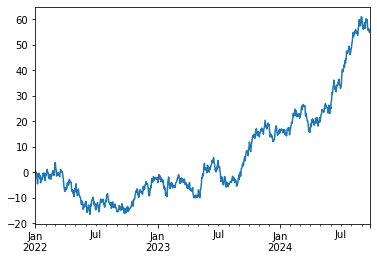

In [92]:
ts = pd.Series(
    np.random.randn(1000), 
    index=pd.date_range("1/1/2022", periods=1000)
)
ts = ts.cumsum()
ts.plot();

On a DataFrame, the `plot()` method is a convenience to plot all of the columns with labels.

<Figure size 432x288 with 0 Axes>

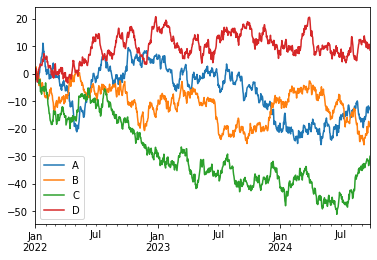

In [93]:
df = pd.DataFrame(
    np.random.randn(1000, 4),
    index=ts.index,
    columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc="best");

## 12. Getting Data In / Out

### CSV
Writing to a csv file.

In [94]:
df.to_csv("foo.csv")

Reading from a csv file.

In [95]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2022-01-01,-0.864119,1.587169,0.181598,-0.847303
1,2022-01-02,1.677406,1.424503,-0.920703,0.417540
2,2022-01-03,0.460597,2.161758,-2.088983,1.950699
3,2022-01-04,0.950951,2.549928,-1.494179,0.353537
4,2022-01-05,0.349708,0.327264,-0.519043,-0.982888
...,...,...,...,...,...
995,2024-09-22,-11.910673,-17.298313,-33.419510,9.886801
996,2024-09-23,-12.358887,-18.552143,-32.224974,10.825383
997,2024-09-24,-12.459955,-18.819308,-32.265607,10.656635
998,2024-09-25,-12.389485,-18.171723,-31.472210,10.014911


### HDF5

Reading and writing to HDFStores.

In [96]:
# df.to_hdf("foo.h5", "df")
# pd.read_hdf("foo.h5", "df")

### Excel

Reading and writing to MS Excel.

In [97]:
# df.to_excel("foo.xlsx", sheet_name="Sheet1")
# pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

## 13. Gotchas

If you are attempting to perform an operation you might see an exception like.

In [98]:
# if pd.Series([False, True, False]):
#   print("I was true")

# >> ValueError

In [99]:
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None
